<a href="https://colab.research.google.com/github/ShivaniMehta-hub/Data-Science/blob/master/MNIST_NN1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf

In [0]:
print(tf.__version__)

1.15.0


In [0]:
pip install tensorflow

In [0]:
import tensorflow as tf

In [0]:
from tensorflow.examples.tutorials.mnist import input_data

In [0]:
mnist = input_data.read_data_sets("MNIST_data", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py fr

In [0]:
type(mnist)

tensorflow.contrib.learn.python.learn.datasets.base.Datasets

In [0]:
mnist.train.images

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [0]:
mnist.validation.images

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [0]:
mnist.train.num_examples

55000

In [0]:
mnist.test.num_examples

10000

In [0]:
mnist.validation.num_examples

5000

In [0]:
## Visualizing data

In [0]:
import matplotlib.pyplot as plt

In [0]:
%matplotlib inline

In [0]:
mnist.train.images.shape

(55000, 784)

In [0]:
mnist.train.images[500]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [0]:
my_image =  mnist.train.images[500].reshape(28,28) #reshaping to 28 pixels

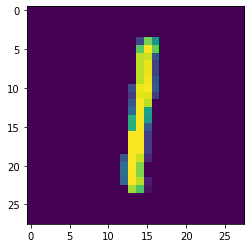

In [0]:
plt.imshow(my_image)

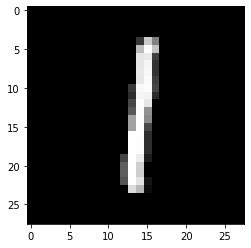

In [0]:
plt.imshow(my_image, cmap='gist_gray')

In [0]:
my_image.min()

0.0

In [0]:
my_image.max()

1.0

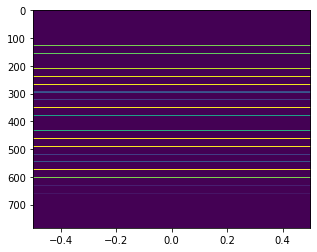

In [0]:
my_image2 = mnist.train.images[500].reshape(784,1)
plt.imshow(my_image2, aspect=0.001)

In [0]:
## Step 3 Building my first NN model
1. Placeholders
2. Variables
3. Create our computation graph
4. Loss Function
5. Optimiser
6. Create and Run the session

In [0]:
x = tf.placeholder(tf.float32, shape = [None, 784])

In [0]:
#Weights and Bias
W = tf.Variable(tf.zeros([784,10]))
b = tf.Variable(tf.zeros([10]))

In [0]:
#create computation graph
y = tf.matmul(x, W) + b

In [0]:
y_true = tf.placeholder(tf.float32, shape = [None, 10])

In [0]:
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels= y_true, logits = y))

In [0]:
# Optimizer

optimizer = tf.train.AdamOptimizer(learning_rate=0.001)
train = optimizer.minimize(cross_entropy)

In [0]:
init = tf.global_variables_initializer()

In [0]:
# Create and run the session

with tf.Session() as sess:
     sess.run(init)

# train  100000
     for step in range(10000):
         batch_x, batch_y = mnist.train.next_batch(100)
         sess.run(train, feed_dict= {x:batch_x, y_true:batch_y})

       # Evaluate the test/train model
     matches = tf.equal(tf.argmax(y, 1), tf.argmax(y_true, 1))
     accuracy =  tf.reduce_mean(tf.cast(matches, tf.float32))
     print(sess.run(accuracy, feed_dict = { x:mnist.test.images, y_true: mnist.test.labels}))

#print("Epoch: {} cost={: .4f}".format(epoch+1, avg_cost))
#print("Model has completed {} Epochs of training ".format(training_epochs))

0.9269
